In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import math
import numpy as np
heart = pd.read_csv("heart.csv")
heart.head()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


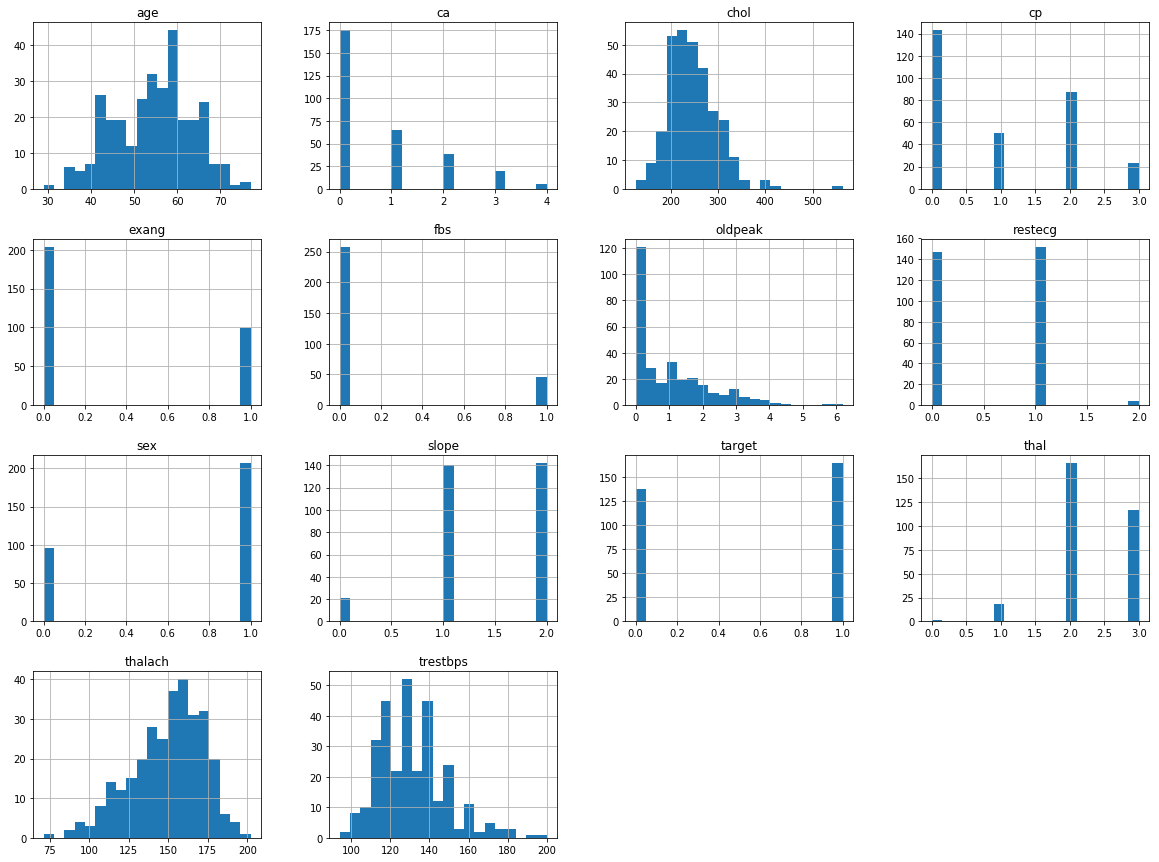

In [2]:
##null check
heart.isnull().sum() ## no NaN present

heart.describe() ## oldpeak is float

%matplotlib inline
heart.hist(bins=20,figsize=(20,15))
plt.show()


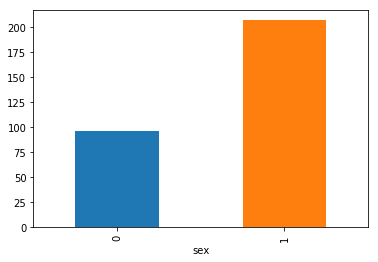

In [3]:
## Since I am not aware of medical term. I had to do some research on each of the term. I am also noting them down.
## CHOL - Total cholesterol levels less than 200 milligrams per deciliter (mg/dL) are considered desirable for adults. A reading between 200 and 239 mg/dL is considered borderline high and a reading of 240 mg/dL and above is considered high. 
## FBS - A fasting blood sugar level less than 100 mg/dL (5.6 mmol/L) is normal. A fasting blood sugar level from 100 to 125 mg/dL (5.6 to 6.9 mmol/L) is considered prediabetes. If it's 126 mg/dL (7 mmol/L) or higher on two separate tests, you have diabetes
## CP -  cp: chest pain type -- Value 1: typical angina -- Value 2: atypical angina -- Value 3: non-anginal pain -- Value 4: asymptomatic 
## trestbps - Optimal blood pressure typically is defined as 120 mm Hg systolic — which is the pressure as your heart beats — over 80 mm Hg diastolic — which is the pressure as your heart relaxes. For your resting heart rate, the target is between 60 and 100 beats per minute (bpm)
## restecg - resting electrocardiographic results
## thalach - maximum heart rate achieved
## exang - ercise induced angina (1 = yes; 0 = no)
## oldpeak   ST depression induced by exercise relative to rest
## slope  the slope of the peak exercise ST segment
## ca   number of major vessels (0-3) colored by flourosopy
## thal  3 = normal; 6 = fixed defect; 7 = reversable defect -  is an inherited blood disorder characterized by less hemoglobin and fewer red blood cells in your body than normal. 
## sex(1 = male; 0 = female)
##Column Pair wise check
heart.groupby('sex')['target'].count().plot(kind='bar',x='target',y='sex');
plt.show()



In [4]:
heart.head(10)
## Converting non-categorical varaible to categorical variable
## heart['age'].sort_values()
df = heart.copy()

for i in range(0,len(df)):
    if (df.loc[i,'age'] >=25 and df.loc[i,'age'] <=35):
        df.loc[i,'agegrp'] = '25-35'
    elif (df.loc[i,'age'] >35 and df.loc[i,'age'] <=45):
        df.loc[i,'agegrp'] = '35-45'
    elif (df.loc[i,'age'] >45 and df.loc[i,'age'] <=55):
        df.loc[i,'agegrp'] = '45-55'
    elif (df.loc[i,'age'] >55 and df.loc[i,'age'] <=65):
        df.loc[i,'agegrp'] = '55-65'
    elif (df.loc[i,'age'] >65 and df.loc[i,'age'] <=77):
        df.loc[i,'agegrp'] = '65-77'
        
    
    if (df.loc[i,'trestbps'] >=94 and df.loc[i,'trestbps'] <=115):
        df.loc[i,'trestbps_grp'] = '94-115'
    elif (df.loc[i,'trestbps'] >115 and df.loc[i,'trestbps'] <=135):
        df.loc[i,'trestbps_grp'] = '115-135'
    elif (df.loc[i,'trestbps'] >135 and df.loc[i,'trestbps'] <=155):
        df.loc[i,'trestbps_grp'] = '135-155'
    elif (df.loc[i,'trestbps'] >155 and df.loc[i,'trestbps'] <=175):
        df.loc[i,'trestbps_grp'] = '155-175'
    elif (df.loc[i,'trestbps'] >175 and df.loc[i,'trestbps'] <=200):
        df.loc[i,'trestbps_grp'] = '175-200'
        
    if (df.loc[i,'chol'] >=126 and df.loc[i,'chol'] <=226):
        df.loc[i,'chol_grp'] = '126-226'
    elif (df.loc[i,'chol'] >226 and df.loc[i,'chol'] <=326):
        df.loc[i,'chol_grp'] = '226-326'
    elif (df.loc[i,'chol'] >326 and df.loc[i,'chol'] <=426):
        df.loc[i,'chol_grp'] = '326-426'
    elif (df.loc[i,'chol'] >426 and df.loc[i,'chol'] <=526):
        df.loc[i,'chol_grp'] = '426-526'
    elif (df.loc[i,'chol'] >526 and df.loc[i,'chol'] <=564):
        df.loc[i,'chol_grp'] = '526-564'
        
    if (df.loc[i,'thalach'] >=71 and df.loc[i,'thalach'] <=100):
        df.loc[i,'thalach_grp'] = '71-100'
    elif (df.loc[i,'thalach'] >100 and df.loc[i,'thalach'] <=130):
        df.loc[i,'thalach_grp'] = '100-130'
    elif (df.loc[i,'thalach'] >130 and df.loc[i,'thalach'] <=160):
        df.loc[i,'thalach_grp'] = '130-160'
    elif (df.loc[i,'thalach'] >160 and df.loc[i,'thalach'] <=190):
        df.loc[i,'thalach_grp'] = '160-190'
    elif (df.loc[i,'thalach'] >190 and df.loc[i,'thalach'] <=202):
        df.loc[i,'thalach_grp'] = '190-202'

df['oldpeak'] = df['oldpeak'].apply(np.ceil) ## Changing the original column

df.head()



,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,agegrp,trestbps_grp,chol_grp,thalach_grp
0,63,1,3,145,233,1,0,150,0,3.0,0,0,1,1,55-65,135-155,226-326,130-160
1,37,1,2,130,250,0,1,187,0,4.0,0,0,2,1,35-45,115-135,226-326,160-190
2,41,0,1,130,204,0,0,172,0,2.0,2,0,2,1,35-45,115-135,126-226,160-190
3,56,1,1,120,236,0,1,178,0,1.0,2,0,2,1,55-65,115-135,226-326,160-190
4,57,0,0,120,354,0,1,163,1,1.0,2,0,2,1,55-65,115-135,326-426,160-190


In [7]:
## Remove the columns which got modified
## df = df.drop(['age','trestbps','chol','thalach'], axis=1)
df.head()

##little more exploratory analysis
import seaborn as sns
#plot data
sns.catplot(x="agegrp", y="target", data=df);


AttributeError: module 'seaborn' has no attribute 'load_dataset'